<a href="https://colab.research.google.com/github/vikash00011/BinaryClassification/blob/master/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing important modules/liberaries


from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Figure 3-1 shows a few more images from the MNIST dataset to give you a feel for
the complexity of the classification task.

(https://github.com/vikash00011/BinaryClassification/blob/master/Capture2.PNG)

Figure 3-1. A few digits from the MNIST dataset

In [0]:
mnist = fetch_openml('mnist_784', version=1)    #loading our sample data

In [0]:
X, y = mnist["data"], mnist["target"]           
#spliting sample data in features(X) and target(y)

Now, we will lookup about the data

In [0]:
print(X.shape)   
# 784 because each image is a 28*28 pixels, and each feature 
# simply represents one pixel’s intensity, from 0 (white) to
# 255 (black) shape is (sample,features(28*28))

print(y.shape)   
# All are target as 1d np array so shape is (70000,)

print(type(y[0]))       
# looking the data type of the target

print(type(X[0][0]))    
# type of X is already in float format

(70000, 784)
(70000,)
<class 'str'>
<class 'numpy.float64'>


In [0]:
y = y.astype(np.uint8)  
#type change from str to int

print(type(y[0]))

<class 'numpy.uint8'>


In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]   
#splitting the samples in traing and testing

In [0]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)  

This classifier has the advantage of being capable of handling very large datasets efficiently.This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning).The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.

In [0]:
sgd_clf.fit(X_train,y_train)      
#Training our classifier

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

In [0]:
sgd_clf.predict([some_digit])    
# doing prediction

array([3], dtype=uint8)

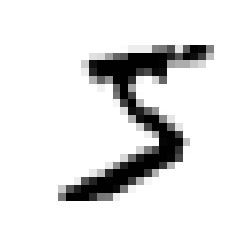

In [0]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Just checking what actual image is there at the location which we are predicting

Heyyy........ Our prediction is not accurate , righr? But to See the overall accuracy of the model we should fetch a generalized mapping of the accuracy. So we will see these in followings

**Performance Measures**


a.) Measuring Accuracy Using Cross-Validation.

**_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**

A good way to evaluate a model is to use cross-validation

In [0]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")  
# cv=3 means we are splitting samples in 3 folds.                                                                      
# then making predictions and evaluating them on each fold 
# using a model trained on the remaining folds

array([0.87082583, 0.87089354, 0.88628294])

These are the accuries on fold 1 to fold 3, we can get the mean to see average accuracy.

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

**_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**  **_________**

b.) Confusion Matrix

**_________**  **_________**  **_________**  **_________**  **_________**

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch).Instead, you can use the cross_val_predict() function:


Instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model
that never saw the data during training).

Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes
(pred)

In [0]:
y_train_5 = (y_train == 5)  
#Just checking labels are 5 or not, in both training and testing data

y_test_5  = (y_test == 5)   
#and assigning them to a new variables to work on confusion matrix 

print(y_train_5.shape)
print(y_test_5.shape)

print(y_train_5)
print(y_test_5)

(60000,)
(10000,)
[ True False False ...  True False False]
[False False False ... False  True False]


In [0]:
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [0]:
from sklearn.metrics import confusion_matrix

cnf_mtx=confusion_matrix(y_train_5,pred)

In [0]:
print(cnf_mtx.shape)
print()

cnf_mtx

(2, 2)



array([[53892,   687],
       [ 1891,  3530]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class): 53,892 of them were correctly classified as non-5s (they are called true negatives), while the remaining 687 were wrongly classified as 5s (false positives).

The second row considers the images of 5s (the positive class): 1,891 were wrongly classified as non-5s (false negatives), while the remaining 3530 were correctly classified as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right).

A perfect matrix will be like below:


In [0]:
perfect=y_train_5

confusion_matrix(perfect,y_train_5)

array([[54579,     0],
       [    0,  5421]])

If you are confused about the confusion matrix, Figure 3-2 may help.

(https://github.com/vikash00011/BinaryClassification/blob/master/Capture3.PNG)

Figure 3-2. An illustrated confusion matrix

c.) Precision and Recall

**_______________**  **_______________**  **_______________**  **_______________**  **_______________**  **_______________**  **_______________**

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the **precision** of the classifier.

**precision = TP/(TP+FP)**

A perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. So precision is typically used along with another metric named **recall, also called sensitivity or true positive rate (TPR)**.

**TPR = TP/(TP+FN)**.

In [0]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5,pred))

print()

print(recall_score(y_train_5,pred))

0.8370879772350012

0.6511713705958311


Now your 5-detector does not look as shiny as it did when you looked at its accuracy. When it claims an image represents a 5, it is correct only 83.71% of the time. Moreover, it only detects 65.12.0% of the 5s.


d.) F1 Score

**_______________**  **_______________**  **_______________**  **_______________**

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall.

Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

**F1=**2/(1/precision)+(1/recall)=2*[(precision*recall)/(precision+recall)]
                             =TP/[TP+(FN+FP/2)]
                             


In [0]:
from sklearn.metrics import f1_score

f1_score(y_train_5,pred)

0.7325171197343846

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall. For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the **precision/recall tradeoff**.

**Precision/Recall Tradeoff**

To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. Figure 3-3 shows a few digits positioned from the lowest score on the left to the highest score on the right. Suppose the decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you raise the threshold (move it to the arrow on the right), the false positive (the 6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one true positive becomes a false negative, decreasing recall down to 50%. Conversely, lowering the threshold increases recall and reduces precision.


(https://github.com/vikash00011/BinaryClassification/blob/master/Capture.PNG) 

Figure 3-3. Decision threshold and precision/recall tradeoff

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want:

In [0]:
y_scores=(sgd_clf.decision_function([some_digit]))

In [0]:
y_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [0]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False,  True, False, False, False, False, False,
        False]])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict() method (i.e., True). Let’s raise the threshold:

In [0]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 8,000.

Now how do you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the cross_val_predict() function again, but this time specifying that you want it to return decision scores instead of predictions:


In [0]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Now with these scores you can compute precision and recall for all possible thresholds using the precision_recall_curve() function:

In [0]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finally, you can plot precision and recall as functions of the threshold value using Matplotlib:

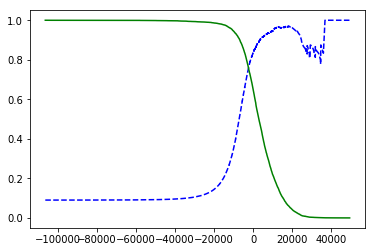

In [0]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

You may wonder why the precision curve is bumpier than the recall curve in Figure. The reason is that precision may sometimes go down when you raise the threshold (although in general it will go up). To understand why, look back at Figure and notice what happens when you start from the central threshold and move it just one digit to the right: precision goes from 4/5 (80%) down to 3/4 (75%). On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth.

Another way to select a good precision/recall tradeoff is to plot precision directly against recall, as shown in Figure below (the same threshold as earlier is highlighed).

(https://github.com/vikash00011/BinaryClassification/blob/master/Capture4.PNG)

Figure. Precision versus recall

You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall tradeoff just before that drop—for example, at around 60% recall. But of course the choice depends on your project. So let’s suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8,000. To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give us the first index of the maximum value, which in this case means the first True value):


In [0]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816

To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can just run this code:

In [0]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Let’s check these predictions’ precision and recall:

In [0]:
print(precision_score(y_train_5, y_train_pred_90))

print()

print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293

0.4799852425751706


Great, you have a 90% precision classifier ! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. Hmm, not so fast. A high-precision classifier is not very useful if its recall is too low.

**Note**  If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

e.) The ROC Curve

**_________________**  **_________________**  **_________________**  **_________________**

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 
1 – secificity.

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function:

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Then you can plot the FPR against the TPR using Matplotlib. This code produces the plot in below Figure:

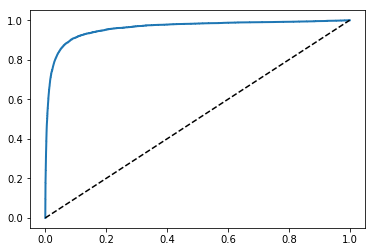

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the topright corner).

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier. First, you need to get scores for each instance in the training set. But due to the way it works (see Chapter 7), the RandomForestClassifier class does not have a decision_function() method. Instead it has a predict_proba() method. Scikit-Learn classifiers generally have one or the other. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


But to plot a ROC curve, you need scores, not probabilities. A simple solution is to use the positive class’s probability as the score:


In [0]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare (below Figure):

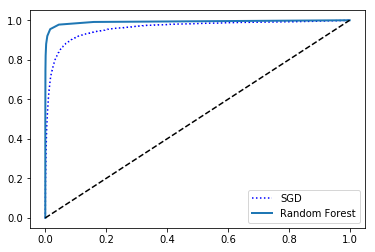

In [0]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

As you can see in upper Figure , the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner. As a result, its ROC AUC score is also significantly better:


In [0]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

Try measuring the precision and recall scores: you should find 99.0% precision and 86.6% recall. Not too bad! Hopefully you now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall tradeoff that fits your needs, and compare various models using ROC curves and ROC AUC scores. 